## Lets build baseline model in this notebook and progress from there
1. read data
2. variable study
    - identify numerical & categorical columns
3. prepare final training set
4. train the model
5. submit

In [1]:
# imports

from pathlib import Path

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
# config

if Path("/kaggle/input").exists():
    # fill when running in kaggle
    pass
else:
    dataset_path = Path("./dataset/")
    result_path = Path("./results")
    result_path.mkdir(parents=True, exist_ok=True)

print([x.name for x in dataset_path.iterdir()])

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

['data_description.txt', 'train.csv', 'test.csv', 'sample_submission.csv']


# load data

In [5]:
train_df = pd.read_csv(dataset_path/"train.csv")
test_df = pd.read_csv(dataset_path/"test.csv")
sample_subm_df = pd.read_csv(dataset_path/"sample_submission.csv")

print(train_df.shape, test_df.shape)

# with open(dataset_path/"data_description.txt", "r") as desc_file:
#     for line in (desc_file.readlines()):
#         print(line, end="")


(1460, 81) (1459, 80)


# variable study

In [7]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## identify numerical and categorical columns

In [40]:
ordinal_cols = [
    "MSSubClass",
    "LotShape",
    "LandSlope",
    "OverallQual",
    "OverallCond",
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "HeatingQC",
    "KitchenQual",
    "Functional",
    "FireplaceQu",
    "GarageFinish",
    "GarageCond",
    "PoolQC",
    "Fence",
    "YrSold",
]

num_cols = [
    "LotFrontage",
    "LotArea",
    "YearBuilt",
    "YearRemodAdd",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    # can they be ordinal columns
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    #
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageYrBlt",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
]

cat_cols = [
    "MSZoning",
    "Street",
    "Alley",
    "LandContour",  # can it be an ordinal variable
    "Utilities",
    "LotConfig",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "MasVnrArea",
    "Foundation",
    "Heating",
    "CentralAir",
    "Electrical",
    "GarageType",
    "PavedDrive",
    "MiscFeature",
    "MoSold",
    "SaleType",
    "SaleCondition",
]

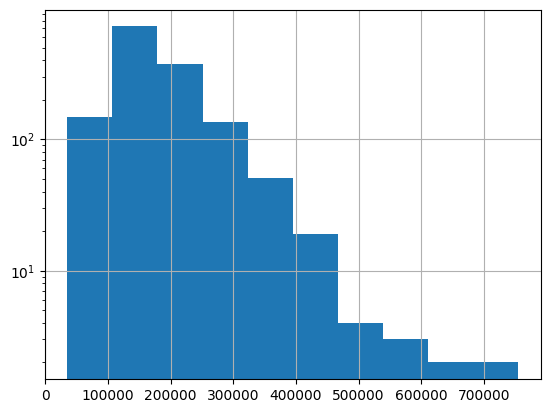

In [44]:
target = train_df.SalePrice
target.hist(log=True)
plt.show()

## filling nulls

In [56]:
def get_nulls_df(df):
    null_cols = df.columns[df.isnull().sum() != 0]
    # print(null_cols)
    null_val_pct = df[null_cols].isnull().sum() * 100 / len(df)
    null_val_pct = null_val_pct.sort_values(ascending=False)
    return null_val_pct

In [57]:
train_null_df = get_nulls_df(train_df)
test_null_df = get_nulls_df(test_df)

In [58]:
train_null_df

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [59]:
test_null_df

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Functional       0.137080
Utilities        0.137080
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
dtype: float64

*observations*
1. PoolQC
2. MiscFeature
3. Alley
4. Fence
5. FireplaceQu 

All the above features have > 80% of null values. Instead of filling them, lets ignore these features for model building

In [61]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

In [99]:
train_df.GarageCond

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageCond, Length: 1460, dtype: object

In [98]:
oe = OrdinalEncoder(categories=[["Ex", "Gd", "TA", "Fa", "Po", "NA"]], handle_unknown="use_encoded_value", unknown_value=-1)
oe.fit_transform(train_df[["GarageCond"]])

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [2.],
       [2.]])

In [75]:
oe.categories_

[array(['Ex', 'Fa', 'Gd', 'Po', 'TA', nan], dtype=object)]

{'non_deterministic': False,
 'requires_positive_X': False,
 'requires_positive_y': False,
 'X_types': ['categorical'],
 'poor_score': False,
 'no_validation': False,
 'multioutput': False,
 'allow_nan': False,
 'stateless': False,
 'multilabel': False,
 '_skip_test': False,
 '_xfail_checks': False,
 'multioutput_only': False,
 'binary_only': False,
 'requires_fit': True,
 'preserves_dtype': [numpy.float64],
 'requires_y': False,
 'pairwise': False}